### 获取数据

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.externals import joblib

In [143]:
data = pd.read_csv('/Users/lujiawen/Desktop/PUBG_to_stu/data/train_V2.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [10]:
data.shape

(4446966, 29)

### 数据处理

#### 异常值

##### 缺失值---判断有无缺失值

In [144]:
np.any(pd.isnull(data))

True

In [145]:
data = data.dropna()
data.shape

(4446965, 29)

#### 缩小数据范围

##### 小组

In [149]:
group_count = data.groupby('matchId').count()
group_count = group_count[(group_count['Id']>70)] 
group_count
data_true_ = data[data["matchId"].isin(group_count.index)]
data_true_
data_true_.shape

(4395037, 29)

##### 切片

In [150]:
data_ = data_true_[::20]
data_.shape

(219752, 29)

In [151]:
data_.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0,0.0,0,0.0,0,0,244.8,1,1466,0.4444
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.1,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.0,5,0,0.6383
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.9,1,0,1,31,...,0,529.1,0,0.0,0,0,327.3,2,0,0.3200
60,5c46a37a783839,fcdc3ec45f9aea,2f985254dfe02b,0,1,170.0,1,1,4,16,...,0,0.0,0,0.0,0,0,3182.0,2,0,0.7200
80,9f3b1c12a9f2ec,fb1d7d36187631,066bda6450c15b,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,103.0,1,0,0.0714


##### 可视化分析开挂数据并剔除

In [219]:
waigua = 'kills'
waigua1 = 'longestKill'
data_.sort_values(by= waigua,ascending=False)[waigua].head()

1834930    26
4159774    26
4268225    23
2548742    20
2963537    20
Name: kills, dtype: int64

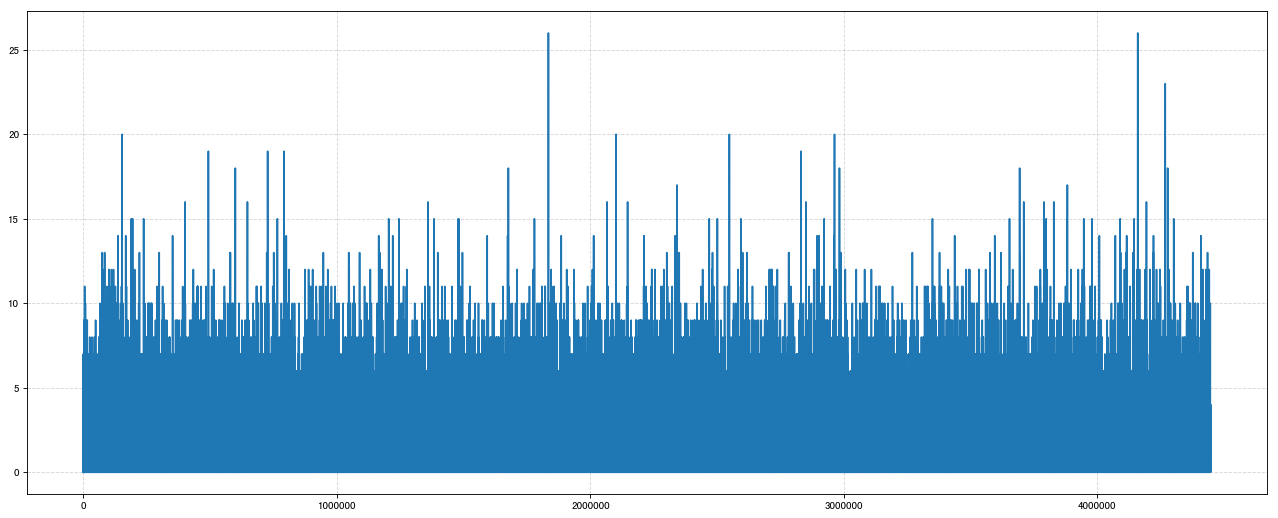

In [217]:
plt.figure(figsize=(20, 8), dpi=80)
x= data_.index
y= data_[waigua]
plt.plot(x,y)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [154]:
# 去掉击杀数大于20的玩家
data_true = data_[(data_[waigua]<20)] 
data_true
data_true.shape

(219745, 29)

##### 文本数据替换

In [155]:
data_true.loc[data_true['matchType']=='solo','matchType'] = 1
data_true.loc[data_true['matchType']=='duo','matchType'] = 2
data_true.loc[data_true['matchType']=='squad','matchType'] = 3
data_true.loc[data_true['matchType']=='solo-fpp','matchType'] = 4
data_true.loc[data_true['matchType']=='duo-fpp','matchType'] = 5
data_true.loc[data_true['matchType']=='squad-fpp','matchType'] = 6

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [95]:
data_true.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0,0.0,0,0.0,0,0,244.8,1,1466,0.4444
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.1,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.0,5,0,0.6383
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.9,1,0,1,31,...,0,529.1,0,0.0,0,0,327.3,2,0,0.3200
60,5c46a37a783839,fcdc3ec45f9aea,2f985254dfe02b,0,1,170.0,1,1,4,16,...,0,0.0,0,0.0,0,0,3182.0,2,0,0.7200
80,9f3b1c12a9f2ec,fb1d7d36187631,066bda6450c15b,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,103.0,1,0,0.0714


##### 比赛类型

In [156]:
match_type = data_true.groupby('matchType').count()
m = match_type.iloc[0:6,]
m

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchType,,,,,,,,,,,,,,,,,,,,,
1,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557,...,8557,8557,8557,8557,8557,8557,8557,8557,8557,8557
2,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661,...,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661
3,31395,31395,31395,31395,31395,31395,31395,31395,31395,31395,...,31395,31395,31395,31395,31395,31395,31395,31395,31395,31395
4,26470,26470,26470,26470,26470,26470,26470,26470,26470,26470,...,26470,26470,26470,26470,26470,26470,26470,26470,26470,26470
5,49451,49451,49451,49451,49451,49451,49451,49451,49451,49451,...,49451,49451,49451,49451,49451,49451,49451,49451,49451,49451
6,87678,87678,87678,87678,87678,87678,87678,87678,87678,87678,...,87678,87678,87678,87678,87678,87678,87678,87678,87678,87678


In [104]:
m.shape

(6, 28)

In [190]:
data_new = data_true[data_true["matchType"].isin(m.index)]

In [193]:
data_new.head()
data_new["matchType"].head()
# data_new.shape

0     6
20    5
40    3
60    6
80    6
Name: matchType, dtype: object

### 分割数据

In [194]:
features= data_new.drop(['Id','groupId','matchId','winPlacePerc'],axis=1)
# features

In [180]:
# features=('assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints').split(',')
# features

In [195]:
# 确定特征值和目标值
x = features #特征
y = data_new["winPlacePerc"] #目标
# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(x, y)  #random_state=22
x_train.shape 
# x_test.shape 

(164409, 25)

### 特征工程

#### 特征提取--

#### 特征预处理---标准化

In [196]:
#  实例化一个转换器
transfer = StandardScaler()
#  调用fit_transform
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

#### 特征降维

In [141]:
# # 低方差特征过滤
# transfer = VarianceThreshold(threshold=1)
# # 2、调用fit_transform
# dataa = transfer.fit_transform(x_train.iloc[:,:])
# print("删除低方差特征的结果：\n", dataa)
# # print("形状：\n", data.shape)


In [203]:
# transfer = PCA(n_components=0.9)
# # 2、调用fit_transform
# data1 = transfer.fit_transform(x_train)

### 训练

In [211]:
estimator = Ridge(alpha=1.0)
estimator.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### 模型保存

In [213]:
joblib.dump(estimator, "/Users/lujiawen/Desktop/第八组/绝地求生.pkl")

['/Users/lujiawen/Desktop/第八组/绝地求生.pkl']

### 评估

In [214]:
y_predict = estimator.predict(x_test)
print("预测值为:\n", y_predict)
print("模型中的系数为:\n", estimator.coef_)
print("模型中的偏置为:\n", estimator.intercept_)

# 5.2 评价
# 均方误差
error = mean_squared_error(y_test, y_predict)
print("误差为:\n", error)

预测值为:
 [0.6862667  0.8620523  0.46392671 ... 0.6069171  0.08694297 0.7861993 ]
模型中的系数为:
 [ 0.00797669  0.02459968  0.01190086 -0.00604572 -0.000881    0.00125277
 -0.20583267 -0.03013976 -0.02665849 -0.10409871  0.00107767 -0.04004264
  0.00483766 -0.07679339  0.10214278  0.08545307  0.0063619   0.02593539
 -0.00040227  0.0031659  -0.00333369  0.0009972   0.13115392  0.02684958
  0.11475043]
模型中的偏置为:
 0.47176095104282617
误差为:
 0.014730701000193669
